In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d rizwan123456789/potato-disease-leaf-datasetpld

 67% 25.0M/37.4M [00:00<00:00, 82.9MB/s]
100% 37.4M/37.4M [00:00<00:00, 82.0MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-disease-leaf-datasetpld.zip','r')
zip_ref.extractall('/content')
zip_ref.close ()

In [7]:
pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.6 MB/s eta 0:00:00


In [8]:
import os
from rembg import remove
from PIL import Image

In [ ]:
input_folder = '/content/PLD_3_Classes_256/Testing/Healthy'  # Replace with the path to the input folder containing images
output_folder = '/content/output/Testing/Healthy'  # Replace with the desired output folder path

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(input_folder):
    input_path = os.path.join(input_folder, filename)
    if os.path.isfile(input_path):

        input_image = Image.open(input_path)
        print(input_image)

        output_image = remove(input_image)

        # Construct the output path by joining the output folder and the current filename
        output_path = os.path.join(output_folder, filename)

        # Save the output image
        output_image.save(output_path,'PNG')

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7B16AD922950>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7B16AD921C00>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7B16AD922A40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7B16AD921660>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7B16AD9233D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7B16AD922A10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7B16AD922380>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7B16AD9224D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7B16AD922A40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7B16AD9226B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7B16AD921C00>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7B16AD921300>
<PIL.JpegImagePl

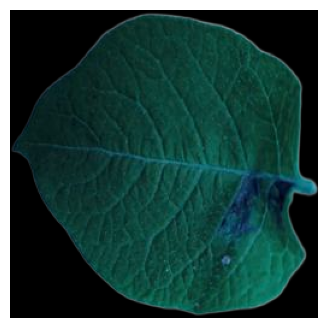

In [19]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(4,4))
rmvbg_image = cv2.imread("/content/output/Validation/Late_Blight/Late_Blight_105.jpg")
plt.imshow(rmvbg_image)
plt.axis('off')
plt.show()
# np.shape(rmvbg_image)


In [20]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [22]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/output/Training',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/output/Testing',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/output/Validation',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3251 files belonging to 3 classes.
Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [23]:
class_names = training_dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [24]:
len(training_dataset)

102

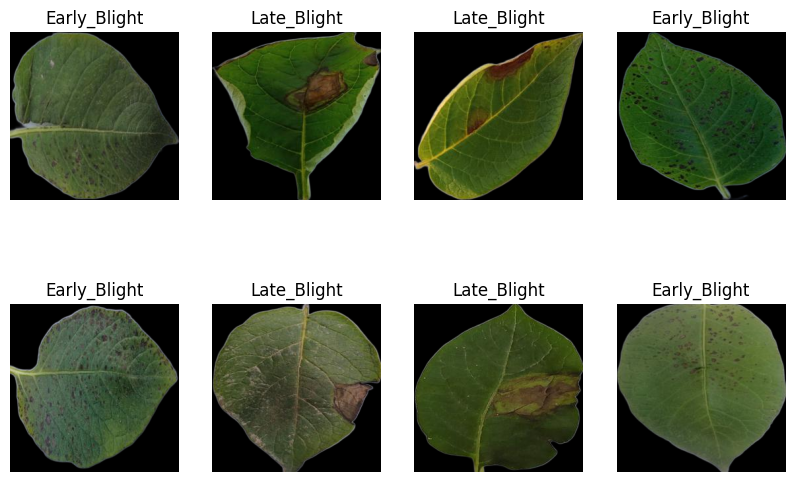

In [27]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in training_dataset.take(1):
    for i in range(0,8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [26]:
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
resize_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [29]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [44]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model2 = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model2.build(input_shape=input_shape)

In [45]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [46]:
model2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [47]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
#early stopping
es= EarlyStopping(monitor= 'val_accuracy',
                   min_delta= 0.001,
                   patience = 9,
                   verbose=1)

#model checkpoint
mc= ModelCheckpoint(filepath= "best_model.h5",
                    monitor= 'val_accuracy',
                    min_delta=0.001,
                    patience=5,
                    verbose=1,
                    save_best_only=True)
#callback cb
cb=[es,mc]

In [48]:
history=model2.fit(
    training_dataset,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=validation_dataset,
    callbacks= cb
)

Epoch 1/50
101/102 [============================>.] - ETA: 0s - loss: 1.0054 - accuracy: 0.4947
Epoch 1: val_accuracy improved from -inf to 0.58413, saving model to best_model.h5
102/102 [==============================] - 16s 119ms/step - loss: 1.0053 - accuracy: 0.4943 - val_loss: 0.9159 - val_accuracy: 0.5841
Epoch 2/50
101/102 [============================>.] - ETA: 0s - loss: 0.6500 - accuracy: 0.6937
Epoch 2: val_accuracy improved from 0.58413 to 0.77885, saving model to best_model.h5
102/102 [==============================] - 13s 118ms/step - loss: 0.6494 - accuracy: 0.6939 - val_loss: 0.5282 - val_accuracy: 0.7788
Epoch 3/50
101/102 [============================>.] - ETA: 0s - loss: 0.4676 - accuracy: 0.8035
Epoch 3: val_accuracy improved from 0.77885 to 0.84375, saving model to best_model.h5
102/102 [==============================] - 13s 119ms/step - loss: 0.4665 - accuracy: 0.8038 - val_loss: 0.3372 - val_accuracy: 0.8438
Epoch 4/50
101/102 [============================>.] - E

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [49]:
model2.evaluate(test_data)

13/13 [==============================] - 0s 26ms/step - loss: 0.0923 - accuracy: 0.9728


[0.09227015823125839, 0.9728395342826843]

In [ ]:
for image_batch,label_batch in test_data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("The Image Title : ",class_names[label_batch[0].numpy()])
    prediction = model.predict(image_batch)
    print("Model Predicted label : ",class_names[np.argmax(prediction[0])])

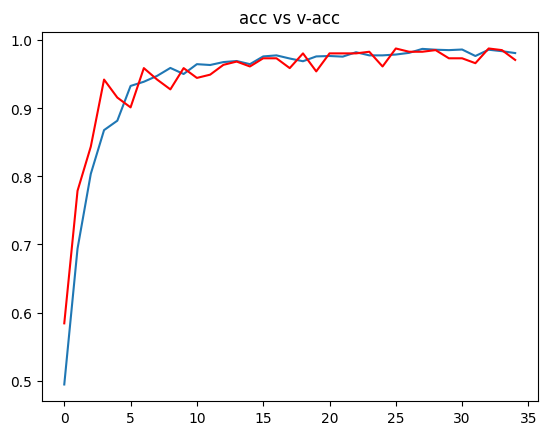

In [50]:
import matplotlib.pyplot as plt

h= history.history
h.keys()
plt.plot(h['accuracy'])
plt.plot (h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

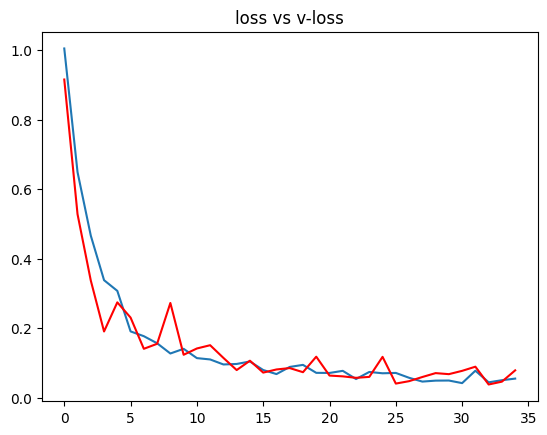

In [51]:
import matplotlib.pyplot as plt

h= history.history
h.keys()
plt.plot(h['loss'])
plt.plot (h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()